# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [2]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Answer to Exercise 1**

The following code reads the data and target files for the cancer data

In [3]:
import matplotlib.pyplot as plt

# Read in the data and targets
cancer_data = pd.read_csv(training_data_path)
cancer_target = pd.read_csv(training_targets_path)

To visualize the distributions of all features, the target and the data has been combined and histograms have been plotted as follows:


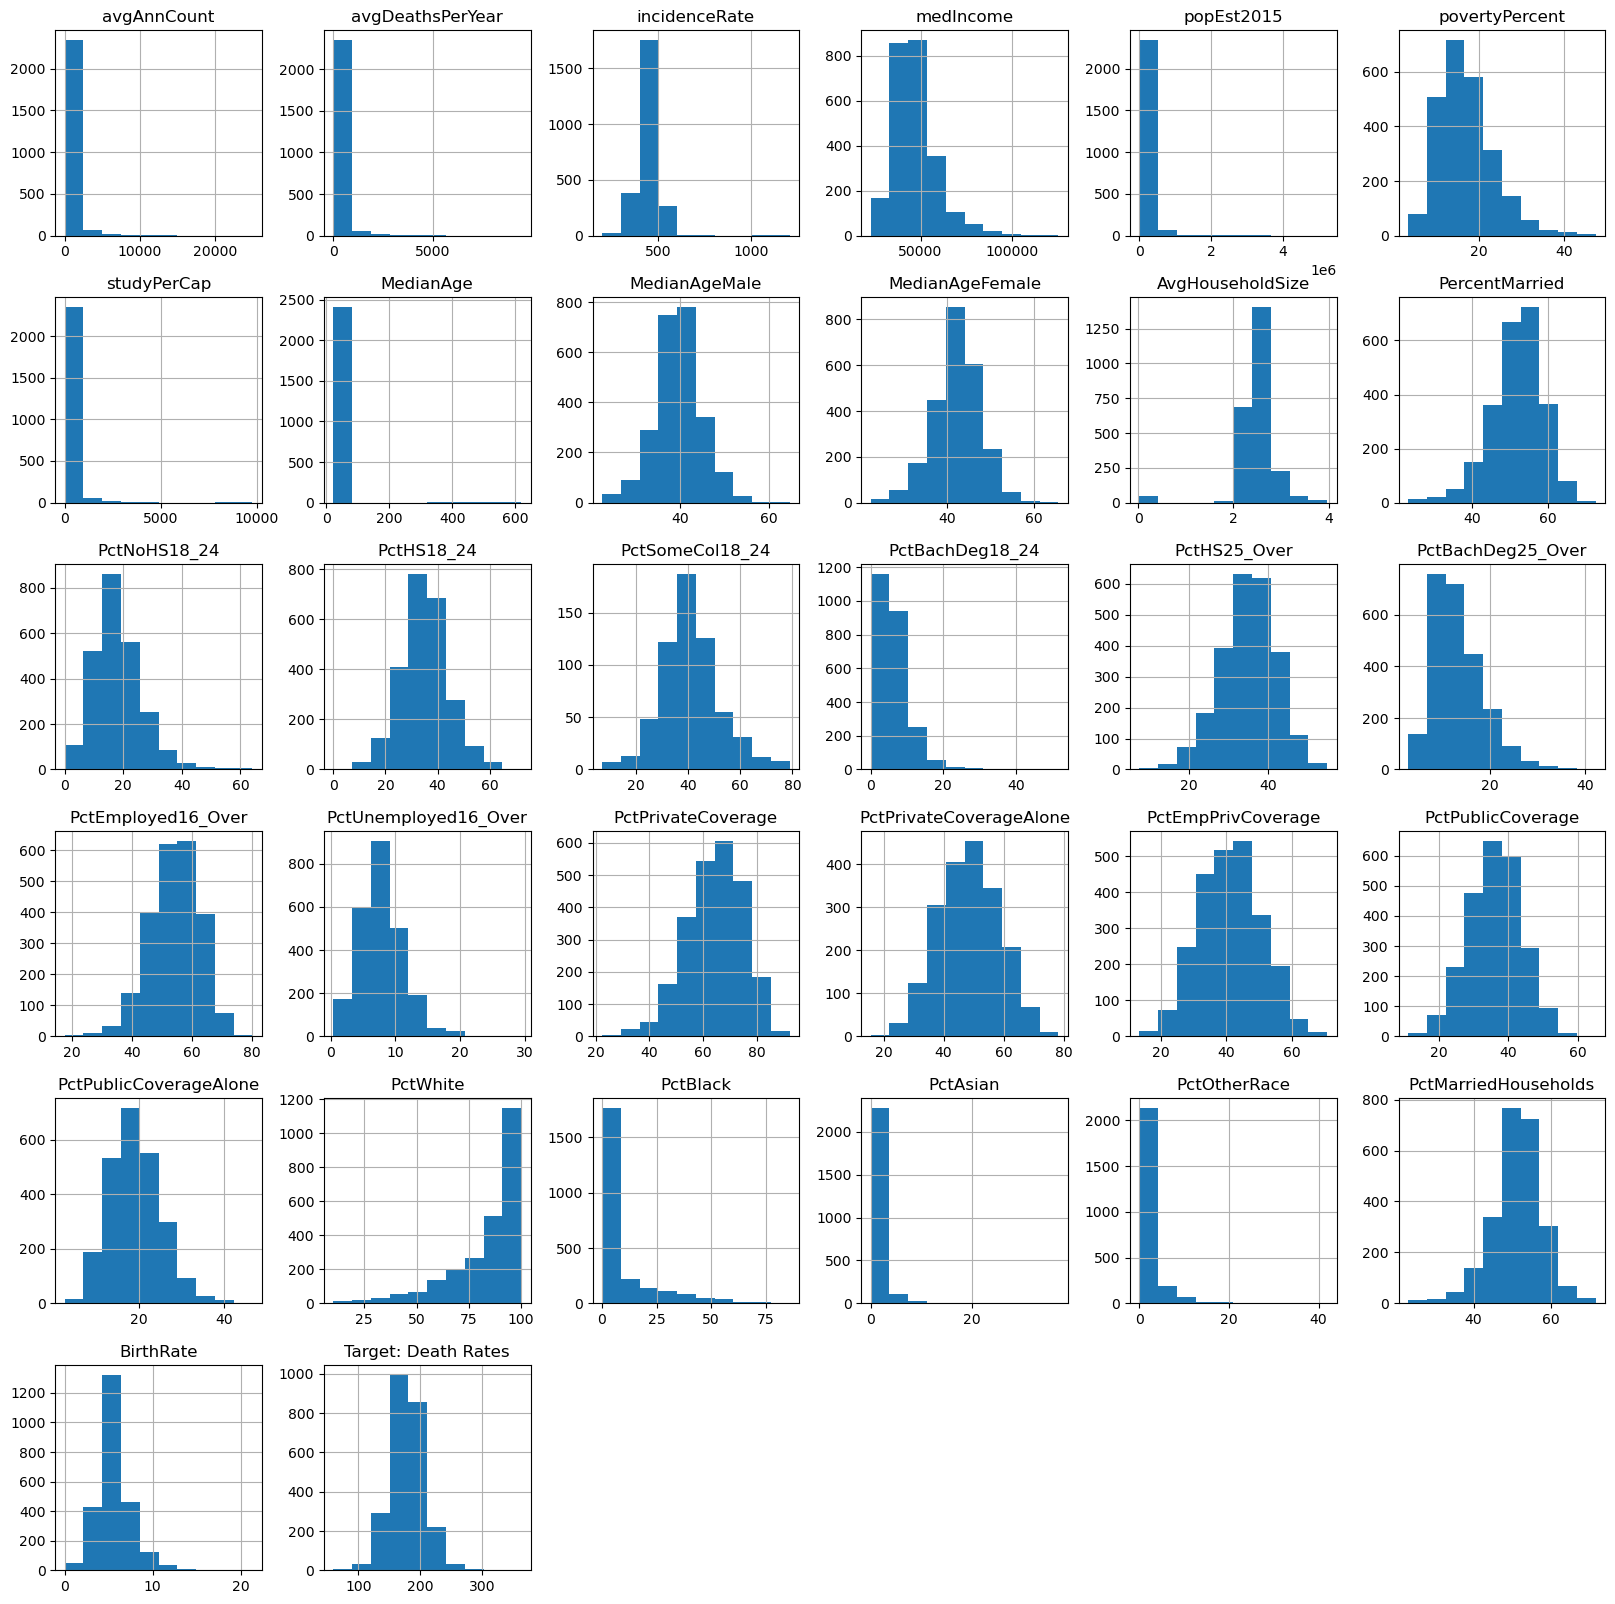

In [4]:
combined_cancer_df=cancer_data.copy()
combined_cancer_df["Target: Death Rates"]= cancer_target

# Plot histograms of all features
combined_cancer_df.hist(figsize=(20, 20))
plt.show()

As can be seen from the histograms, we are able to detect a few outliers, espcially in the <b> MedianAge </b> attribute, we can see that some ages are above the normal age range (0 - 100) and go upto 600, which is impossible in human years.

In [5]:
# Compute correlations of all features with target variable
correlations = cancer_data.corrwith(cancer_target['TARGET_deathRate'])

# Sort correlations by strength
correlations = correlations.abs().sort_values(ascending=False)

# Print top five features with strongest correlations
print("Top five features with strongest correlations to target:")
print(correlations[:5])

Top five features with strongest correlations to target:
PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
dtype: float64


The above features have relatively strong positive correlations with the target variable, indicating that they may have a significant influence on the target variable and can be considered as important predictors in the analysis.

array([[<Axes: xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<Axes: xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <Axes: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <Axes: xlabel='medIncome', ylabel='incidenceRate'>,
        <Axes: xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<Axes: xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='medIncome', ylabel='PctPublicCoverageAlone'>,
        <Axes: xl

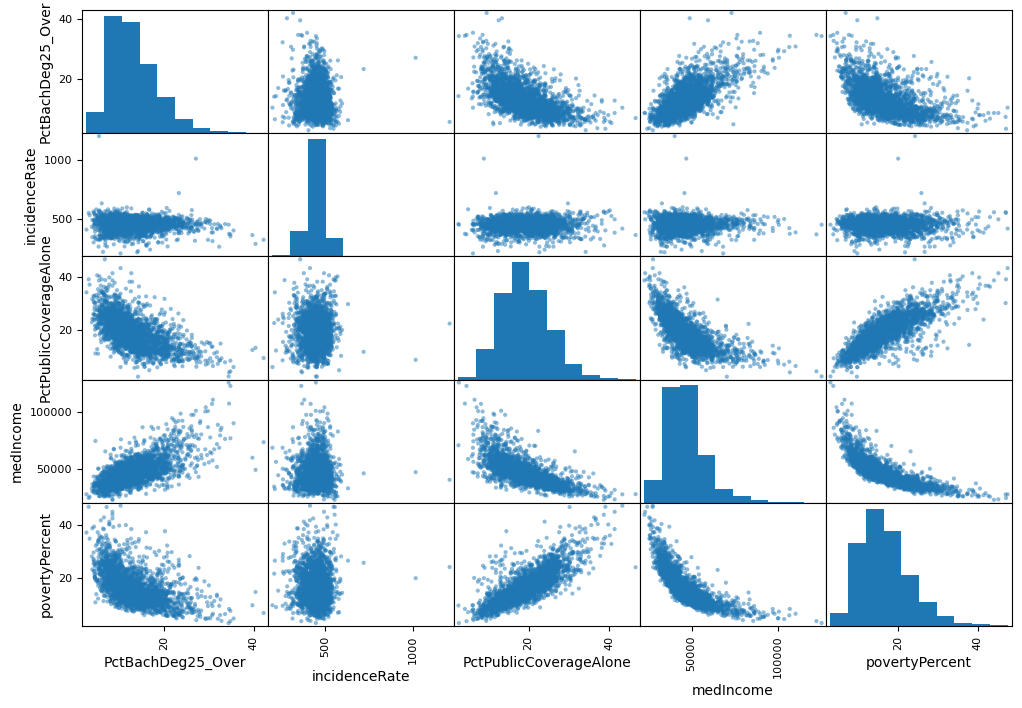

In [6]:
from pandas.plotting import scatter_matrix

attributes=['PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','medIncome','povertyPercent']

scatter_matrix(cancer_data[attributes],figsize=(12,8))

Based on the scatter plot analysis, we observed two notable correlations among the selected features:

Positive Correlation between povertyPercent and PctPublicCoverageAlone:
The scatter plot demonstrates a clear increasing trend between povertyPercent and PctPublicCoverageAlone. This suggests that as the poverty percentage in a county increases, a higher proportion of individuals rely solely on public medical coverage rather than private coverage. The positive correlation implies that areas with higher poverty rates tend to have a greater dependence on public coverage for medical expenses.

Negative Correlation between povertyPercent and medIncome:
Our analysis reveals a negative correlation between povertyPercent and medIncome. As median income increases, there is a corresponding decrease in the poverty percentage. This indicates that counties with higher median incomes exhibit lower poverty rates compared to counties with lower median incomes. The observed relationship suggests that higher income levels contribute to reduced poverty rates within a given area.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Answer to Exercise 2**


The code below utilizes the train_test_split function from the sklearn.model_selection module to split the cancer dataset into training and testing sets. The feature data (X) and target variable (y) are passed as input, along with the desired test size (20% in this case) and a random state value of 42 for reproducibility. The function returns four datasets: X_train_cancer (training feature data), X_test_cancer (testing feature data), y_train_cancer (training target variable), and y_test_cancer (testing target variable). This division facilitates the evaluation of machine learning models by training them on the training set and assessing their performance on the testing set.

In [7]:
from sklearn.model_selection import train_test_split
X=cancer_data.copy()
y=cancer_target.copy()
# assuming X is data and y is target variable
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y, test_size=0.2, random_state=42)


The following code creates a preprocessing pipeline using Pipeline from sklearn.pipeline. The pipeline consists of two steps: imputation and standardization. The SimpleImputer is used to replace missing values with the median, and StandardScaler is applied to standardize the data. The pipeline is then used to transform the training and testing data separately.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

# Transform data to fit the preprocessing pipeline
X_train_cancer_prepared = preprocessing_pipeline.fit_transform(X_train_cancer)
X_test_cancer_prepared = preprocessing_pipeline.fit_transform(X_test_cancer)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Answer to Exercise 3**


The code uses grid search with cross-validation to find the optimal alpha values for Lasso and Ridge models. It performs a search over a range of alpha values and selects the ones that yield the best performance. The chosen alpha values are then printed.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Define parameter grid for Lasso and Ridge models
param_grid = {'regressor__alpha': np.logspace(-4, 4, 9)}

# Perform grid search for Lasso model
lasso_cv = GridSearchCV(Pipeline([('preprocessor', preprocessing_pipeline),
                                   ('regressor', Lasso())]), 
                        param_grid, cv=10)
lasso_cv.fit(X_train_cancer_prepared, y_train_cancer)

# Perform grid search for Ridge model
ridge_cv = GridSearchCV(Pipeline([('preprocessor', preprocessing_pipeline),
                                   ('regressor', Ridge())]), 
                        param_grid, cv=10)
ridge_cv.fit(X_train_cancer_prepared, y_train_cancer)

# Choose best alpha value for Lasso and Ridge models
alpha_lasso = lasso_cv.best_params_['regressor__alpha']
alpha_ridge = ridge_cv.best_params_['regressor__alpha']

# Print best alpha values
print("Best alpha for Lasso:", alpha_lasso)
print("Best alpha for Ridge:", alpha_ridge)


Best alpha for Lasso: 0.1
Best alpha for Ridge: 10.0



The code fits linear regression, Lasso, and Ridge models on the cancer dataset. It calculates evaluation metrics such as MSE, RMSE, MAE, and R-squared for each model and prints the results. The Lasso and Ridge models use the best alpha values obtained through cross-validation.

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create a LinearRegression object
lr = LinearRegression()

# fit the Linear Regression model on the training data
lr.fit(X_train_cancer_prepared, y_train_cancer)

# Fit Lasso model
lasso = Lasso(alpha=alpha_lasso) # Using best alpha for lasso from cross-validation
lasso.fit(X_train_cancer_prepared, y_train_cancer)

# Fit Ridge model
ridge = Ridge(alpha=alpha_ridge) # Using best alpha for ridge from cross-validation
ridge.fit(X_train_cancer_prepared, y_train_cancer)

# make predictions on the test data
y_pred_ols = lr.predict(X_test_cancer_prepared)

# make predictions on the test data
y_pred_lasso = lasso.predict(X_test_cancer_prepared)

# make predictions on the test data
y_pred_ridge = ridge.predict(X_test_cancer_prepared)


# calculate evaluation metrics on the test data
mse_ols = mean_squared_error(y_test_cancer, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
mae_ols = mean_absolute_error(y_test_cancer, y_pred_ols)
r2_ols = r2_score(y_test_cancer, y_pred_ols)

# print the evaluation metrics
print("OLS: ")
print("Mean Squared Error: ", mse_ols)
print("Root Mean Squared Error: ", rmse_ols)
print("Mean Absolute Error: ", mae_ols)
print("R-squared Score: ", r2_ols)
print()

# calculate evaluation metrics on the test data
mse_lasso = mean_squared_error(y_test_cancer, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test_cancer, y_pred_lasso)
r2_lasso = r2_score(y_test_cancer, y_pred_lasso)

# print the evaluation metrics
print("Lasso")
print("Mean Squared Error: ", mse_lasso)
print("Root Mean Squared Error: ", rmse_lasso)
print("Mean Absolute Error: ", mae_lasso)
print("R-squared Score: ", r2_lasso)
print()

# calculate evaluation metrics on the test data
mse_ridge = mean_squared_error(y_test_cancer, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test_cancer, y_pred_ridge)
r2_ridge = r2_score(y_test_cancer, y_pred_ridge)

# print the evaluation metrics
print("Ridge")
print("Mean Squared Error: ", mse_ridge)
print("Root Mean Squared Error: ", rmse_ridge)
print("Mean Absolute Error: ", mae_ridge)
print("R-squared Score: ", r2_ridge)


OLS: 
Mean Squared Error:  360.1407523813789
Root Mean Squared Error:  18.97737474945834
Mean Absolute Error:  13.994291267400298
R-squared Score:  0.5623793510841155

Lasso
Mean Squared Error:  362.1477218717291
Root Mean Squared Error:  19.03017923908572
Mean Absolute Error:  14.07481926938979
R-squared Score:  0.5599406065518351

Ridge
Mean Squared Error:  360.15887973966846
Root Mean Squared Error:  18.977852347925687
Mean Absolute Error:  14.000925245414063
R-squared Score:  0.5623573238454724


Based on the evaluation metrics, the Ordinary Least Squares (OLS) model outperforms the Lasso and Ridge models. OLS has the lowest Mean Squared Error (MSE) of 360.1407, indicating better predictive accuracy. The Root Mean Squared Error (RMSE) for OLS is 18.9774, which is lower than the RMSE values of Lasso and Ridge models. Additionally, OLS has the lowest Mean Absolute Error (MAE) of 13.9943, suggesting better overall prediction performance. Furthermore, the R-squared score of OLS (0.5624) indicates that it explains a higher proportion of the variance in the target variable compared to Lasso and Ridge models. Therefore, based on these metrics, we can conclude that the OLS model is the best performing model among the three.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

# **Answer to Exercise 4**

The code uses Lasso regression to identify the top five important features in the dataset. It fits the Lasso model, calculates the absolute coefficients, sorts them, and selects the top five features. Finally, it prints the selected features. Lasso regression is effective for feature selection as it shrinks irrelevant coefficients to zero, helping us identify the most influential features in the dataset.

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=alpha_lasso)
lasso.fit(X_train_cancer_prepared, y_train_cancer)

coef = pd.Series(lasso.coef_, index=X_train_cancer.columns)
important_features = coef.abs().sort_values(ascending=False).head(5)
print(important_features)


incidenceRate           10.092283
PctBachDeg25_Over        7.222027
PctPrivateCoverage       6.080492
PctMarriedHouseholds     5.302948
PercentMarried           4.469378
dtype: float64


 In this case, the top five features are 'incidenceRate', 'PctBachDeg25_Over', 'PctPrivateCoverage', 'PctMarriedHouseholds', and 'PercentMarried'. These features have relatively high coefficients, indicating a strong relationship with the target variable in the Lasso regression model.

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Answers for Exercise 5**


The following code uses grid search with cross-validation to find the best hyperparameters for a Random Forest Regressor. It searches over different combinations of the number of estimators, maximum depth, and minimum samples leaf to find the optimal values. The best hyperparameters are printed at the end.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# define the random forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [250, 500, 750, 1000],
    'max_depth': [30, 50, 75, 100, None],
    'min_samples_leaf': [1, 2, 4, 8]
}

# define the grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=10, n_jobs=-1, verbose=2)

# fit the grid search to the training data
grid_search.fit(X_train_cancer_prepared, np.ravel(y_train_cancer))

# print the best hyperparameters found
print('Best hyperparameters: ', grid_search.best_params_)


Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 1000}


The code below uses the best hyperparameters obtained from the previous grid search. It fits a Random Forest Regressor model to the training data with the specified hyperparameters, makes predictions on the test data, and calculates evaluation metrics such as mean squared error, root mean squared error, mean absolute error, and R-squared score. The evaluation metrics are then printed.

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class
rf = RandomForestRegressor(random_state=42, max_depth=30, min_samples_leaf=4, n_estimators=1000)

# Fit the model to the training data
rf.fit(X_train_cancer_prepared, np.ravel(y_train_cancer))

# Make predictions on the test data
y_pred_rf = rf.predict(X_test_cancer_prepared)

# calculate evaluation metrics on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_rf = mean_squared_error(y_test_cancer, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_cancer, y_pred_rf)
r2_rf = r2_score(y_test_cancer, y_pred_rf)

# print the evaluation metrics
print("Random Forest")
print("Mean Squared Error: ", mse_rf)
print("Root Mean Squared Error: ", rmse_rf)
print("Mean Absolute Error: ", mae_rf)
print("R-squared Score: ", r2_rf)
print()

Random Forest
Mean Squared Error:  401.8723979119783
Root Mean Squared Error:  20.046755296356025
Mean Absolute Error:  14.088949446332313
R-squared Score:  0.511669650288886



Based on the evaluation metrics, the OLS (Ordinary Least Squares) model performs better than the Random Forest model.

The OLS model has a lower mean squared error (360.14) and root mean squared error (18.98) compared to the Random Forest model (401.87 and 20.05, respectively). The mean absolute error is also lower for the OLS model (13.99) compared to the Random Forest model (14.09). Additionally, the R-squared score is higher for the OLS model (0.56) indicating a better fit to the data compared to the Random Forest model (0.51).

Therefore, based on these evaluation metrics, the OLS model is considered the better model in this case.


The code below calculates the feature importances using the RandomForestRegressor and sorts them in descending order. It then prints the top 5 most important features along with their importance scores.

In [13]:
from sklearn.ensemble import RandomForestRegressor
importances = rf.feature_importances_
# Get feature importances and sort by descending order
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 5 most important features 
top_n = 5
print("Top {} most important features:".format(top_n))
for i in range(top_n):
    feature_idx = indices[i]
    feature_name = X_train_cancer.columns[feature_idx]
    importance_score = importances[feature_idx]
    print("{}. {} ({:.4f})".format(i+1, feature_name, importance_score))


Top 5 most important features:
1. PctBachDeg25_Over (0.2346)
2. incidenceRate (0.2171)
3. medIncome (0.0492)
4. PctHS25_Over (0.0454)
5. avgDeathsPerYear (0.0404)


In the Random Forest model, the top 5 most important features are PctBachDeg25_Over, incidenceRate, medIncome, PctHS25_Over, and avgDeathsPerYear, with importance scores ranging from 0.2346 to 0.0404.

In the Lasso model, the top 5 most important features are incidenceRate, PctBachDeg25_Over, PctPrivateCoverage, PctMarriedHouseholds, and PercentMarried, with importance scores ranging from 10.0923 to 4.4694.

Comparing the two models, we can see that the feature importance rankings differ. While some features appear in both models, their importance scores vary. It's important to note that the importance scores are relative within each model and cannot be directly compared between models.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

# **Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# preprocessing entire data 
data_prepared=preprocessing_pipeline.transform(cancer_data)

# Fit the OLS model to the entire training data
ols_model =LinearRegression()
ols_model.fit(data_prepared, cancer_target)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Unseen test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
test_data_prepared=preprocessing_pipeline.transform(test_data)
ols_predictions = ols_model.predict(test_data_prepared)

mse = mean_squared_error(test_targets, ols_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_targets, ols_predictions)
r2 = r2_score(test_targets, ols_predictions)

# print the evaluation metrics
print("Random Forest")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared Score: ", r2)
print()

Random Forest
Mean Squared Error:  555.7421609775557
Root Mean Squared Error:  23.574184205981673
Mean Absolute Error:  17.472840434369225
R-squared Score:  0.2654415277777531



# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

The following code is used to set the data paths 

In [16]:
import matplotlib.pyplot as plt
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


 The following code snippet is used to read the data from the csv files

In [17]:
heart_data = pd.read_csv(data_features_path)
heart_target=pd.read_csv(data_targets_path)
combined_heart_data = heart_data.copy()
combined_heart_data['Target']= heart_target #Combining data in order to plot histograms with the target variable

The following code is used to plot histograms and visualize the data and check if there are any notable ooutliers

array([[<Axes: title={'center': 'AgeAtHeartAttack'}>,
        <Axes: title={'center': 'PericardialEffusion'}>,
        <Axes: title={'center': 'FractionalShortening'}>],
       [<Axes: title={'center': 'epss'}>,
        <Axes: title={'center': 'lvdd'}>,
        <Axes: title={'center': 'WallMotionIndex'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

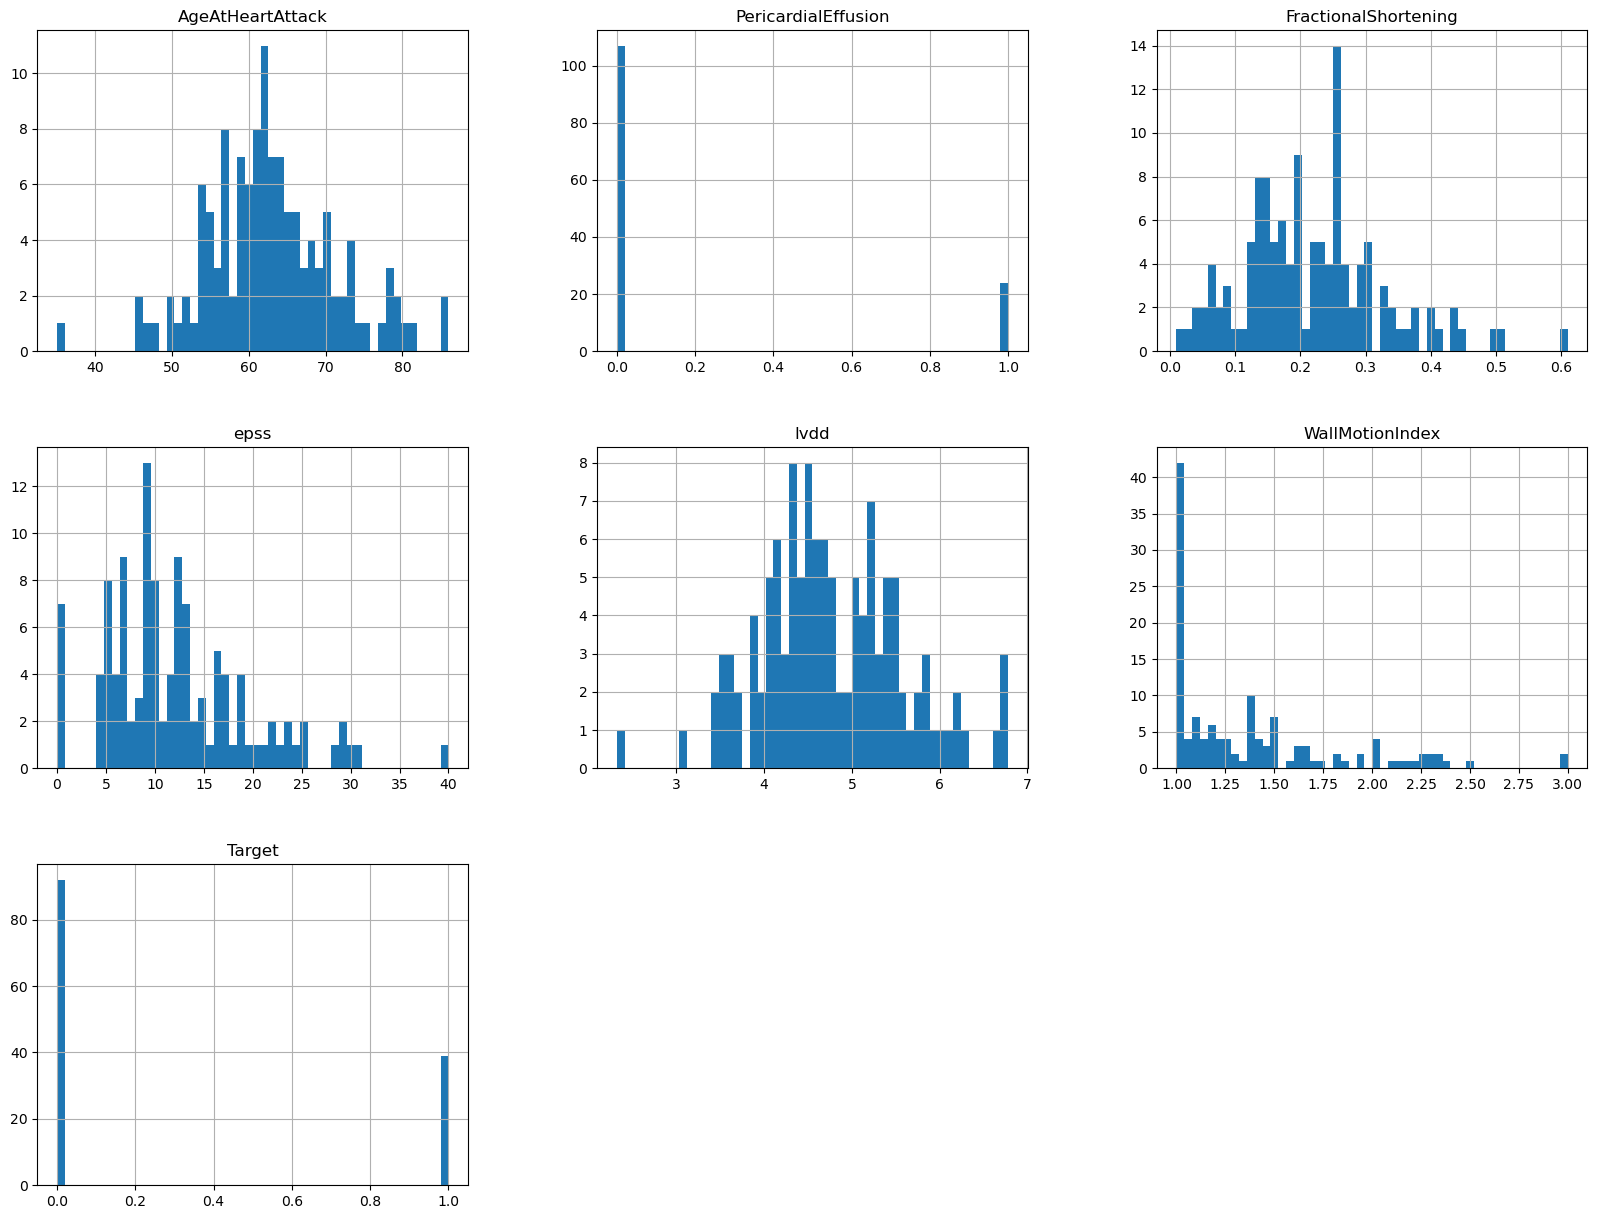

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

combined_heart_data.hist(bins=50,figsize=(20,15))



Based on the histogram plots, we can observe potential outliers in the columns AgeAtHeartAttack, FractionalShortening, epss, lvdd, and WallMotionIndex. To further investigate these outliers, we will utilize the IQR (Interquartile Range) method to precisely identify them. It is worth noting that we will not find outliers in the PericardialEffusion column since it consists of categorical data with only 0's and 1's.

The detect_outliers_iqr function uses the interquartile range (IQR) method to detect outliers in a specific column of a dataframe. It calculates the first quartile (Q1), third quartile (Q3), and the IQR. Based on these values, it identifies outliers by filtering the dataframe. The function then returns a dataframe containing the detected outliers.

In [19]:
def detect_outliers_iqr(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    
    return pd.DataFrame(outliers)


In [20]:
print("Outliers in AgeAtHeartAttack column")
outliers = pd.DataFrame(detect_outliers_iqr(combined_heart_data, 'AgeAtHeartAttack'))
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in FractionalShortening column")
outliers = detect_outliers_iqr(combined_heart_data, 'FractionalShortening')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in epss column")
outliers = detect_outliers_iqr(combined_heart_data, 'epss')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in lvdd column")
outliers = detect_outliers_iqr(combined_heart_data, 'lvdd')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in WallMotionIndex column")
outliers = detect_outliers_iqr(combined_heart_data, 'WallMotionIndex')
print(outliers)

Outliers in AgeAtHeartAttack column
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
21              85.0                    1                 0.180  19.0  5.46   
26              35.0                    0                 0.300   5.0  4.17   
69              86.0                    0                 0.225  12.2  5.20   

    WallMotionIndex  Target  
21             1.38       1  
26             1.00       0  
69             2.18       1  
-----------------------------------------------------------------
Outliers in FractionalShortening column
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
35              61.0                    0                  0.61  13.1  4.07   
38              68.0                    0                  0.51   NaN  3.88   
96              59.0                    0                  0.50   9.1  3.42   

    WallMotionIndex  Target  
35            1.625       0  
38            1.670       0  
96            

From the above code for outlier detection, we have used the function detetct_outliers_iqr() in order to check outliers for each column. However we can see that the column such as AgeAtHeartAttack outlier values can be possible in a real world scenario, a person can have a heart attack at the age of 35, 85 or 86, and these need not be any abnormal values, so we're going to ignore the 'detected' outliers.

## Handling outliers
To handle outliers in the given dataset, we have two options: removing the outliers or replacing them with the median values. Considering the small size of the dataset (131 rows) and the significance of potential information loss, it is advisable to replace the outlier values with the median of their respective columns. This approach preserves the data integrity while mitigating the impact of outliers on the analysis.

Here's an improved version of the function that replaces outliers with the median value:

In [21]:
import pandas as pd
import numpy as np

def replace_outliers_with_median(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace the outliers with the median value
    median_value = dataframe[column].median()
    dataframe.loc[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound), column] = median_value
    
    return dataframe


In this function, we calculate the lower and upper bounds based on the interquartile range (IQR) and replace any values outside these bounds with the median value of the column. The modified DataFrame is returned, and you can use it for further analysis or display.

In [22]:
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'FractionalShortening')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'epss')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'lvdd')
combined_heart_data = replace_outliers_with_median(combined_heart_data, 'WallMotionIndex')

The outliers in our data have been taken care of.

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

The heart data is first split into training and test sets

In [23]:
heart_train = combined_heart_data.drop("Target", axis=1)
heart_target =combined_heart_data["Target"]

from sklearn.model_selection import train_test_split

# assuming X is your data and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(heart_train, heart_target, test_size=0.2, random_state=42)



The following code creates a preprocessing pipeline with two steps: imputation and standardization. It applies the pipeline to the training and test data, resulting in prepared versions of the datasets. The pipeline ensures missing values are filled with medians and features are standardized for further analysis.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preprocessing_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared=preprocessing_pipeline.fit_transform(X_test)

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [25]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# Create an array of different C values to try
Cs = np.logspace(-4, 4, 10)

# Create an L1 logistic regression model with cross-validation
l1_logreg_cv = LogisticRegressionCV(Cs=Cs, penalty='l1', solver='liblinear', cv=10, scoring='accuracy')

# Fit the model to the training data
l1_logreg_cv.fit(X_train_prepared, y_train)

# Get the best C value
best_C = l1_logreg_cv.C_[0]

print("Best C value:", best_C)


Best C value: 21.54434690031882


In [26]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# Create an array of different C values to try
Cs = np.logspace(-4, 4, 10)

# Create an L2 logistic regression model with cross-validation
l2_logreg_cv = LogisticRegressionCV(Cs=Cs, penalty='l2', solver='lbfgs', cv=10, scoring='accuracy')

# Fit the model to the training data
l2_logreg_cv.fit(X_train_prepared, y_train)

# Get the best C value
best_C = l2_logreg_cv.C_[0]

print("Best C value:", best_C)


Best C value: 0.046415888336127774


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters you want to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
#     'max_iter':[0,10,100,1000,10000,100000]
}

# Create a logistic regression model
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Create a GridSearchCV object with the logistic regression model and the hyperparameter grid
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='f1_weighted')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_prepared, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10}
Best score:  0.6697030175706646


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
model = LogisticRegression(penalty='l1', solver='liblinear')

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1_weighted')
grid_search.fit(X_train_prepared, y_train)

# Print the best C value and corresponding score
print('Best C:', grid_search.best_params_['C'])
print('Best score:', grid_search.best_score_)


Best C: 10
Best score: 0.6697030175706646


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the logistic regression model with L2 penalty
logreg_l2 = LogisticRegression(penalty='l2')

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Define the scoring metric (F1 score)
scorer = make_scorer(f1_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg_l2, param_grid=param_grid, scoring='f1_weighted', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_prepared, y_train)

# Print the best hyperparameters and the corresponding F1 score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 10}
Best F1 score:  0.6697030175706646


In [30]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train logistic regression model without regularisation
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_prepared, np.ravel(y_train))
y_pred = logistic_regression.predict(X_test_prepared)
print('No Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred)))
print()
# Train logistic regression model with L1 regularisation
l1_logistic_regression = LogisticRegression(penalty='l1', solver='liblinear',C=21.54434690031882)
l1_logistic_regression.fit(X_train_prepared,np.ravel(y_train))

# Train logistic regression model with L2 regularisation
l2_logistic_regression = LogisticRegression(penalty='l2',C=0.046415888336127774)
l2_logistic_regression.fit(X_train_prepared,np.ravel(y_train))

# Predict on the test set and evaluate performance
y_pred_l1 = l1_logistic_regression.predict(X_test_prepared)
print('L1 Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred_l1)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred_l1, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred_l1)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred_l1)))

# Train logistic regression classifier with L2 regularization
# clf_l2 = LogisticRegression(penalty='l2', random_state=42, max_iter=5000)
# clf_l2.fit(X_train_prepared, y_train)

# Predict on the test set and evaluate performance
y_pred_l2 = l2_logistic_regression.predict(X_test_prepared)
print('\nL2 Regularization')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred_l2)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred_l2, zero_division=1)))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred_l2)))
print('F1 Score: {:.5f}'.format(f1_score(y_test, y_pred_l2)))

No Regularization
Accuracy: 0.77778
Precision: 0.60000
Recall: 0.42857
F1 Score: 0.50000

L1 Regularization
Accuracy: 0.77778
Precision: 0.60000
Recall: 0.42857
F1 Score: 0.50000

L2 Regularization
Accuracy: 0.77778
Precision: 1.00000
Recall: 0.14286
F1 Score: 0.25000


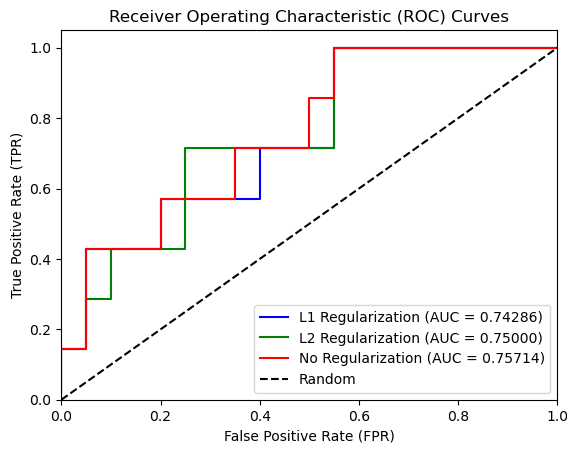

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X_test_prepared and y_test are your test set
# Assuming l1_model and l2_model are your logistic regression models with L1 and L2 regularization respectively
# Assuming no_reg_model is your logistic regression model without regularization

# Generate predicted probabilities for positive class for each model
y_scores_l1 = l1_logistic_regression.predict_proba(X_test_prepared)[:, 1]
y_scores_l2 = l2_logistic_regression.predict_proba(X_test_prepared)[:, 1]
y_scores_no_reg = logistic_regression.predict_proba(X_test_prepared)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold values for each model
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_test, y_scores_l1)
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_test, y_scores_l2)
fpr_no_reg, tpr_no_reg, thresholds_no_reg = roc_curve(y_test, y_scores_no_reg)

# Compute the area under the ROC curve (AUC) for each model
roc_auc_l1 = auc(fpr_l1, tpr_l1)
roc_auc_l2 = auc(fpr_l2, tpr_l2)
roc_auc_no_reg = auc(fpr_no_reg, tpr_no_reg)

# Plot the ROC curves for each model
plt.figure()
plt.plot(fpr_l1, tpr_l1, color='blue', label='L1 Regularization (AUC = %0.5f)' % roc_auc_l1)
plt.plot(fpr_l2, tpr_l2, color='green', label='L2 Regularization (AUC = %0.5f)' % roc_auc_l2)
plt.plot(fpr_no_reg, tpr_no_reg, color='red', label='No Regularization (AUC = %0.5f)' % roc_auc_no_reg)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation for both models
l1_scores = cross_val_score(l1_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
l2_scores = cross_val_score(l2_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
no_scores = cross_val_score(logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the scores for both models
print("L1 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l1_scores.mean(), l1_scores.std() * 2))
print("L2 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l2_scores.mean(), l2_scores.std() * 2))
print("no Regularization: Accuracy: %0.8f (+/- %0.5f)" % (no_scores.mean(), no_scores.std() * 2))


L1 Regularization: Accuracy: 0.69363636 (+/- 0.24664)
L2 Regularization: Accuracy: 0.73181818 (+/- 0.16267)
no Regularization: Accuracy: 0.68363636 (+/- 0.23648)


# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_prepared, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train Random Forest classifier
rf_class = RandomForestClassifier(max_depth= None,min_samples_leaf=4, min_samples_split= 2, n_estimators= 100,random_state=42)
rf_class.fit(X_train_prepared, y_train)
X_test_prep=preprocessing_pipeline.fit_transform(X_test)
# Make predictions on test set
y_pred = rf_class.predict(X_test_prep)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")


Random Forest Classifier:
Accuracy: 0.7407
Precision: 0.5000
Recall: 0.2857
F1 score: 0.3636


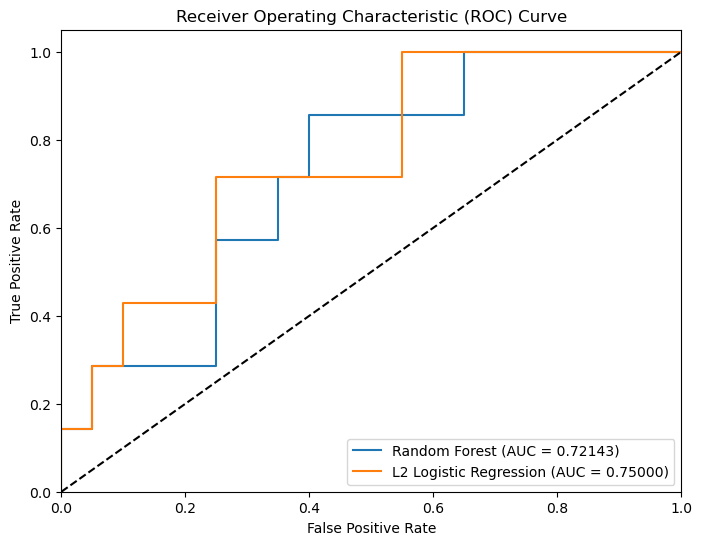

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest Classifier
rf_probabilities = rf_class.predict_proba(X_test_prepared)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# L2 Logistic Regression
l2_probabilities = l2_logistic_regression.predict_proba(X_test_prepared)[:, 1]
l2_fpr, l2_tpr, _ = roc_curve(y_test, l2_probabilities)
l2_auc = roc_auc_score(y_test, l2_probabilities)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.5f})')
plt.plot(l2_fpr, l2_tpr, label=f'L2 Logistic Regression (AUC = {l2_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In this case, the L2 regularization model has a higher AUC value, indicating better predictive performance and a higher ability to discriminate between the positive and negative classes compared to the Random Forest model.

Therefore, based on the AUC values, the L2 regularization model appears to be performing better in terms of classification performance than the Random Forest model.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform cross-validation for both models
l2_scores = cross_val_score(l2_logistic_regression, X_train_prepared, y_train, cv=10, scoring='accuracy')
rf_scores = cross_val_score(rf_class, X_train_prepared, y_train, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the scores for both models
print("Random Forest Classification: Accuracy: %0.8f (+/- %0.5f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("L2 Regularization: Accuracy: %0.8f (+/- %0.5f)" % (l2_scores.mean(), l2_scores.std() * 2))

Random Forest Classification: Accuracy: 0.64454545 (+/- 0.23796)
L2 Regularization: Accuracy: 0.73181818 (+/- 0.16267)


The Random Forest Classification model has an accuracy of 0.64636364 with a standard deviation of +/- 0.22817, while the L2 Regularization model has an accuracy of 0.73181818 with a standard deviation of +/- 0.16267.

Based on these results, the L2 Regularization model shows a slightly higher accuracy and lower variation compared to the Random Forest Classification model. Therefore, in this case, the L2 Regularization model may be considered better in terms of accuracy and stability.

In [55]:
# Get feature importances
importances = rf_class.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
top_features = feature_importances.sort_values('Importance', ascending=False).head(5)

# Print the top five features
print(top_features)

                Feature  Importance
3                  epss    0.251046
4                  lvdd    0.214613
0      AgeAtHeartAttack    0.181711
5       WallMotionIndex    0.175975
2  FractionalShortening    0.139644


These features are ranked based on their importance values, with the highest importance assigned to the "lvdd" feature and the lowest to the "WallMotionIndex" feature.